In [112]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl

In [70]:
videogame= pd.read_csv(r"videogame_reviews_fixed.csv")
videogame

,note,developer,genre,release_date,review_critic,review_grade,seperate_reviews,title,user_score
0,1,"Cybernate, Chris Suffern",Action,12-Jul-16,The Escapist,80,67,Super Mutant Alien Assault,3.8
1,2,"Cybernate, Chris Suffern",Action,12-Jul-16,Brash Games,80,67,Super Mutant Alien Assault,3.8
2,3,"Cybernate, Chris Suffern",Action,12-Jul-16,GameCrate,75,67,Super Mutant Alien Assault,3.8
3,4,"Cybernate, Chris Suffern",Action,12-Jul-16,Impulsegamer,66,67,Super Mutant Alien Assault,3.8
4,5,"Cybernate, Chris Suffern",Action,12-Jul-16,COGconnected,65,67,Super Mutant Alien Assault,3.8
...,...,...,...,...,...,...,...,...,...
37081,37082,Bungie,Action,15-Sep-15,Gameblog.fr,80,86,Destiny: The Taken King,6.2
37082,37083,Bungie,Action,15-Sep-15,Hardcore Gamer,80,86,Destiny: The Taken King,6.2
37083,37084,Bungie,Action,15-Sep-15,Toronto Sun,80,86,Destiny: The Taken King,6.2
37084,37085,Bungie,Action,15-Sep-15,Kill Screen,80,86,Destiny: The Taken King,6.2


In [82]:
videogame['user_score'] = videogame.user_score.apply(lambda e: None if e == 'tbd' else e).astype(float)*10

In [83]:
videogame['user_score'].unique()

array([38., 48., 28., nan, 73., 27., 50., 64., 76., 56., 78., 77., 59.,
       60., 63., 83., 75.,  8., 79., 71., 70., 69., 54., 67., 84., 37.,
       66., 81., 53., 43., 80., 34., 82., 51., 87., 62., 58., 65., 55.,
       57., 11., 74., 68., 72., 85., 36., 61., 86., 26., 33., 44., 18.,
       41., 52., 21., 17., 16., 31., 39., 40., 49., 35., 42., 23., 47.,
       45., 46., 14., 32., 22., 24., 30., 29., 15., 13., 25., 20., 12.,
       88., 89., 90.])

In [123]:
print(videogame.dtypes.to_string())

note                  int64
developer            object
genre                object
release_date         object
review_critic        object
review_grade          int64
seperate_reviews      int64
title                object
user_score          float64


In [72]:
def genre_trends(x): 
    if 'Action Adventure' in x:
        return 'Fantasy'
    elif 'Adventure' in x:
        return 'Fantasy'
    elif 'Shooter' in x:
        return 'Action'
    elif 'First-Person' in x:
        return 'Action'
    elif 'Third-Person' in x:
        return 'Action'
    elif 'Role-Playing' in x:
        return 'RPG'
    elif 'Strategy' in x:
        return 'RPG'
    elif 'Role-Playing' in x:
        return 'RPG'
    elif 'Fantasy' in x:
        return 'RPG'
    elif 'Action RPG' in x:
        return 'RPG'
    elif 'Puzzle' in x:
        return 'RPG'
    elif 'Platformer' in x:
        return 'RPG'
    elif 'Console-style RPG' in x:
        return 'RPG'
    elif 'Sports' in x:
        return 'Sports'
    elif 'Racing' in x:
        return 'Sports'
    elif 'Driving' in x:
        return 'Sports'
    elif 'GT / Street' in x:
        return 'Sports'
    elif 'Miscellaneous' in x:
        return 'Indie'
    elif 'General' in x:
        return 'Indie'
    elif 'Simulation' in x:
        return 'Indie'
    elif 'Modern' in x:
        return 'Indie'
    elif 'Horror' in x:
        return 'Indie'
    elif 'Historic' in x:
        return 'Indie'
    elif 'Traditional' in x:
        return 'Indie'
    elif 'Arcade' in x:
        return 'Indie'
    elif '2D' in x:
        return 'Indie'
    elif 'Massively Multiplayer Online' in x:
        return 'Indie'
    elif 'Tycoon' in x:
        return 'Indie'
    elif 'Alternative' in x:
        return 'Indie'
    elif 'Sci-Fi' in x:
        return 'Action'
    elif 'Japanese-Style' in x:
        return 'RPG'
    else: 
        pass
    
    return x
# Action = 1, RPG = 2, Sports= 3, Indie= 4

In [73]:
videogame_genre = ["genre"]
for videogame_genre in videogame_genre:
    videogame[videogame_genre] = videogame[videogame_genre].apply(genre_trends)

In [103]:
videogame['user_score'] = videogame['user_score'].fillna(0)

In [111]:
videogame_developer= videogame.groupby(["developer"])[["review_grade", "seperate_reviews", "user_score"]].mean()
videogame_developer['Developer'] = videogame_developer.index
videogame_developer

,review_grade,seperate_reviews,user_score,Developer
developer,,,,
10tons,78.000000,71.250000,48.750000,10tons
"10tons Entertainment, 10tons",69.300000,63.550000,63.350000,"10tons Entertainment, 10tons"
"10tons Entertainment, 10tons Ltd, 10tons",70.833333,65.000000,62.000000,"10tons Entertainment, 10tons Ltd, 10tons"
"10tons Ltd, 10tons",64.850000,65.900000,52.250000,"10tons Ltd, 10tons"
11 bit studios,82.961538,79.057692,73.307692,11 bit studios
...,...,...,...,...
nDreams,71.416667,66.000000,60.000000,nDreams
roll7,84.318182,81.333333,65.303030,roll7
team ok,77.666667,71.000000,60.000000,team ok


Text(0.5, 1.0, 'Scatter plot of developer in Relation to Critic Score and User Score')

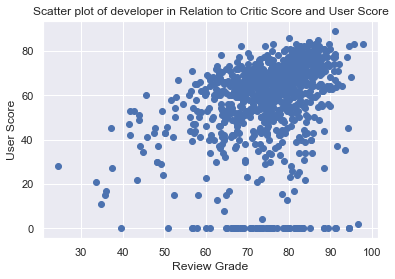

In [116]:
plt.scatter(videogame_developer['review_grade'], videogame_developer['user_score'])
plt.xlabel('Review Grade')
plt.ylabel('User Score')
plt.title('Scatter plot of developer in Relation to Critic Score and User Score')

Text(0.5, 1.0, 'Scatter plot of developer in Relation of Seperate Review Scores and User Scores')

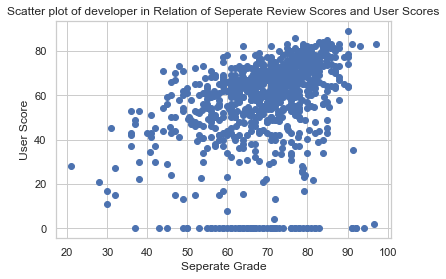

In [133]:
plt.scatter(videogame_developer['seperate_reviews'], videogame_developer['user_score'])
plt.xlabel('Seperate Grade')
plt.ylabel('User Score')
plt.title('Scatter plot of developer in Relation of Seperate Review Scores and User Scores')

In [119]:
videogame_genre= videogame.groupby(["genre"])[["review_grade", "seperate_reviews", "user_score"]].mean()
videogame_genre['Genre'] = videogame_genre.index
videogame_genre

,review_grade,seperate_reviews,user_score,Genre
genre,,,,
Action,76.867281,73.327506,58.000160,Action
Fantasy,77.450806,73.928455,55.567486,Fantasy
Indie,78.706872,75.046612,67.255166,Indie
RPG,79.099423,76.081283,61.195331,RPG
Sports,77.243177,74.146686,55.740253,Sports


Text(0.5, 1.0, 'Average Critic Review Grades Related to Genres')

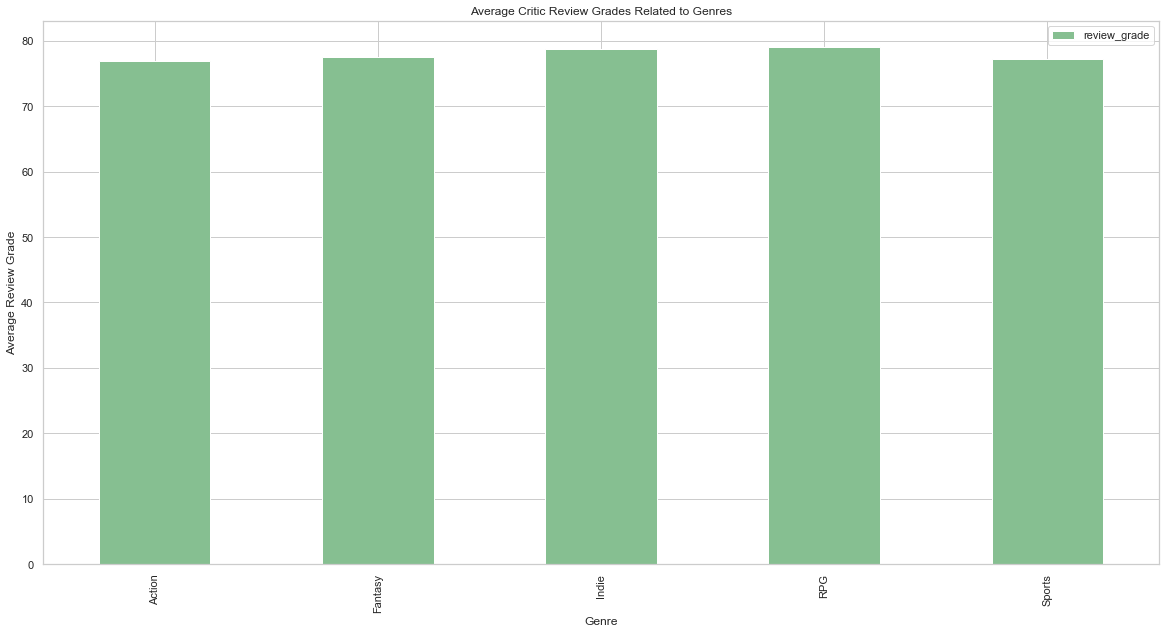

In [126]:
videogame_genre.plot.bar(x="Genre", y="review_grade", title="Average Critic Review Grades Related to Genres", figsize=(20,10), color='#86bf91')
plt.xlabel('Genre')
plt.ylabel('Average Review Grade')
plt.title('Average Critic Review Grades Related to Genres')

Text(0.5, 1.0, 'Average Critic Review Grades Related to Genres')

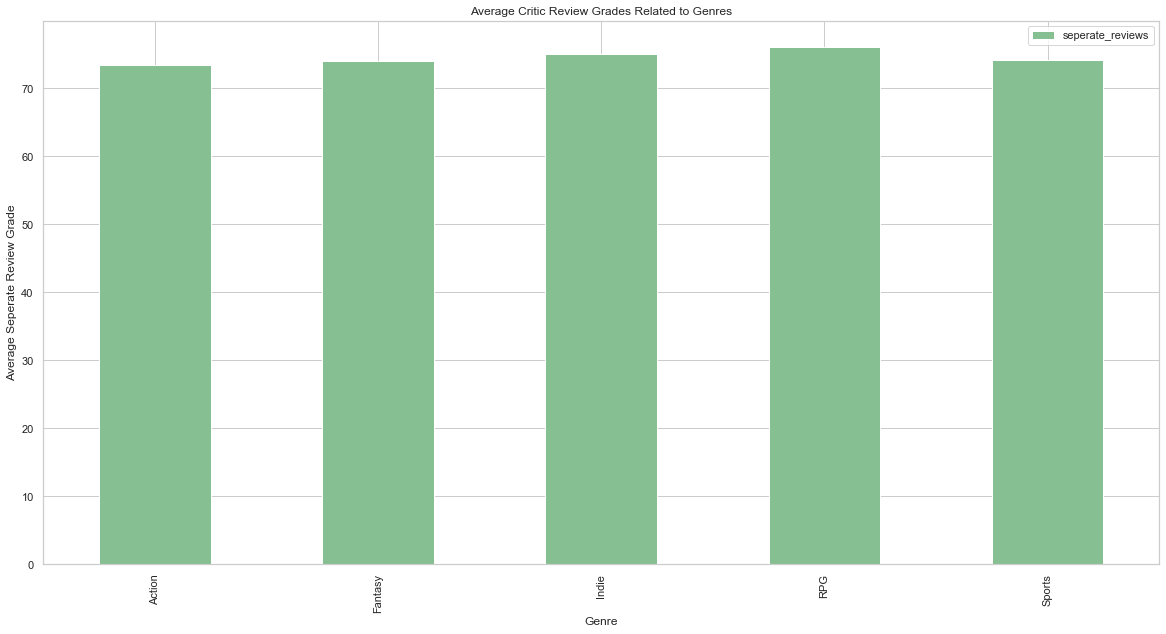

In [127]:
videogame_genre.plot.bar(x="Genre", y="seperate_reviews", title="Average Seperate Review Grades Related to Genres", figsize=(20,10), color='#86bf91')
plt.xlabel('Genre')
plt.ylabel('Average Seperate Review Grade')
plt.title('Average Critic Review Grades Related to Genres')

Text(0.5, 1.0, 'Average Critic Review Grades Related to Genres')

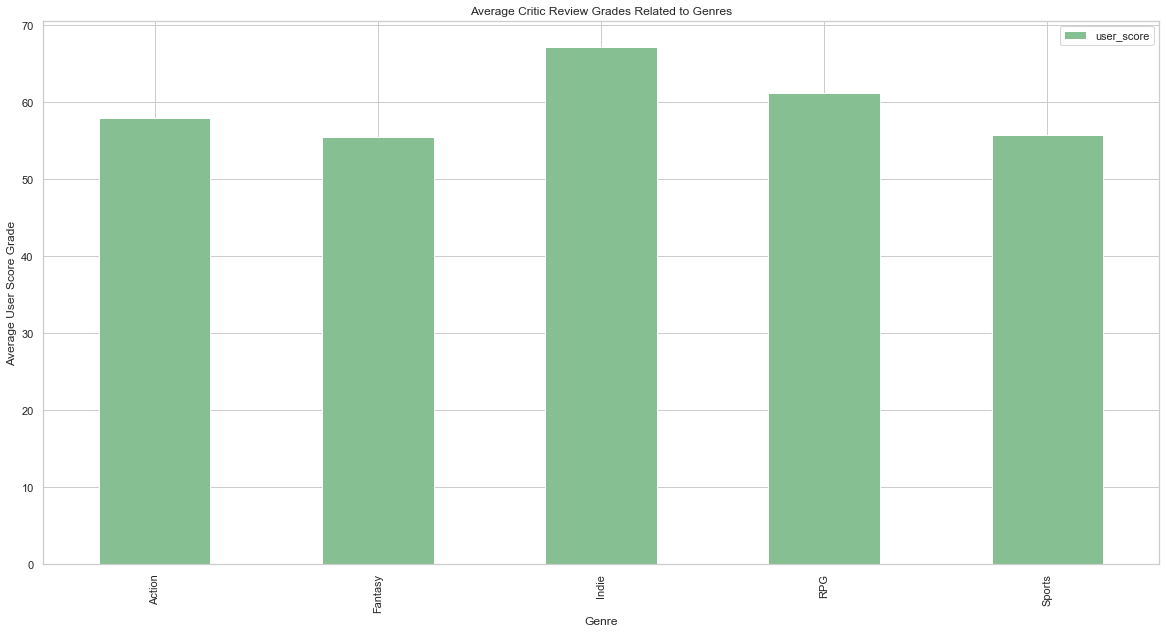

In [128]:
videogame_genre.plot.bar(x="Genre", y="user_score", title="Average Critic User Score Grades Related to Genres", figsize=(20,10), color='#86bf91')
plt.xlabel('Genre')
plt.ylabel('Average User Score Grade')
plt.title('Average Critic Review Grades Related to Genres')

In [108]:
videogame_release= videogame.groupby(["release_date"])[["review_grade", "seperate_reviews", "user_score"]].mean()
videogame_release['Release Date'] = videogame_release.index
videogame_release

,review_grade,seperate_reviews,user_score,Release Date
release_date,,,,
1-Apr-14,78.411765,70.000000,58.000000,1-Apr-14
1-Apr-16,45.666667,53.000000,60.000000,1-Apr-16
1-Aug-17,79.706897,74.706897,63.172414,1-Aug-17
1-Dec-15,77.373134,73.000000,68.029851,1-Dec-15
1-Dec-16,70.307692,64.230769,62.769231,1-Dec-16
...,...,...,...,...
9-Nov-18,85.036364,84.078788,45.527273,9-Nov-18
9-Oct-15,88.238806,86.000000,85.000000,9-Oct-15
9-Oct-18,80.000000,71.846154,42.230769,9-Oct-18


Text(0.5, 1.0, 'Scatter plot of developer in Relation to Critic Score and User Score')

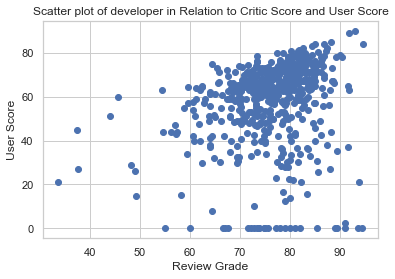

In [138]:
plt.scatter(videogame_release['review_grade'], videogame_release['user_score'])
plt.xlabel('Review Grade')
plt.ylabel('User Score')
plt.title('Scatter plot of developer in Relation to Critic Score and User Score')

Text(0.5, 1.0, 'Scatter plot of developer in Relation to Critic Score and User Score')

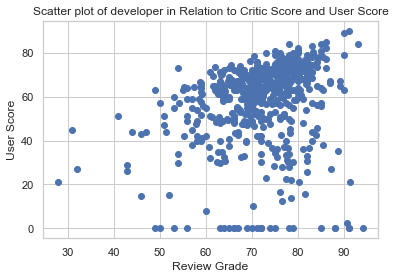

In [137]:
plt.scatter(videogame_release['seperate_reviews'], videogame_release['user_score'])
plt.xlabel('Review Grade')
plt.ylabel('User Score')
plt.title('Scatter plot of developer in Relation to Critic Score and User Score')

In [109]:
videogame_title= videogame.groupby(["title"])[["review_grade", "seperate_reviews", "user_score"]].mean()
videogame_title['Title'] = videogame_title.index
videogame_title

,review_grade,seperate_reviews,user_score,Title
title,,,,
.hack//G.U. Last Recode,77.176471,76.0,78.0,.hack//G.U. Last Recode
10 Second Ninja X,79.909091,76.0,53.0,10 Second Ninja X
1001 Spikes,80.000000,78.0,66.0,1001 Spikes
100ft Robot Golf,67.727273,56.0,59.0,100ft Robot Golf
11-11: Memories Retold,79.250000,77.0,81.0,11-11: Memories Retold
...,...,...,...,...
flOw,73.000000,71.0,65.0,flOw
flower,97.000000,91.0,72.0,flower
iO,75.000000,68.0,0.0,iO


Text(0.5, 1.0, 'Scatter plot of developer in Relation to Critic Score and User Score')

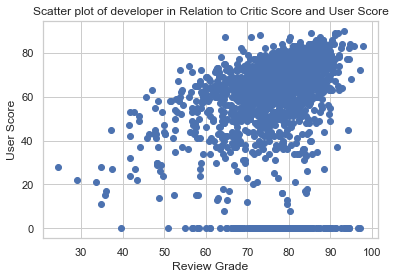

In [139]:
plt.scatter(videogame_title['review_grade'], videogame_title['user_score'])
plt.xlabel('Review Grade')
plt.ylabel('User Score')
plt.title('Scatter plot of developer in Relation to Critic Score and User Score')

Text(0.5, 1.0, 'Scatter plot of developer in Average Seperate Review Critic Score and User Score in Relation to Title')

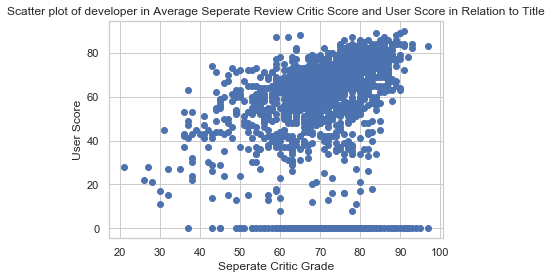

In [150]:
plt.scatter(videogame_title['seperate_reviews'], videogame_title['user_score'])
plt.xlabel('Seperate Critic Grade')
plt.ylabel('User Score')
plt.title('Scatter plot of developer in Average Seperate Review Critic Score and User Score in Relation to Title')

In [74]:
for c in videogame.columns[1:]:
    if c in ['note']:
        # skip the above columns, because they are not categorical
        continue
    print('\nCOLUMN: "{}"\n=============================='.format(c))
    print(videogame[c].value_counts(dropna=False).to_string())


COLUMN: "developer"
Capcom                                                           1013
Square Enix                                                       761
Omega Force                                                       661
Ubisoft Montreal                                                  652
EA Sports                                                         500
TT Games                                                          469
From Software                                                     452
Konami                                                            420
Codemasters                                                       385
Bandai Namco Games                                                369
DONTNOD Entertainment                                             364
Ryu ga Gotoku Studios                                             355
SCE Japan Studio                                                  355
Bungie                                                            350


COLUMN: "review_grade"
MAX:  100
MIN:  8
NaN:  0


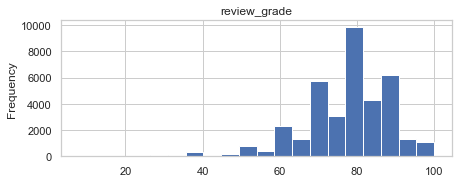




COLUMN: "seperate_reviews"
MAX:  97
MIN:  21
NaN:  0


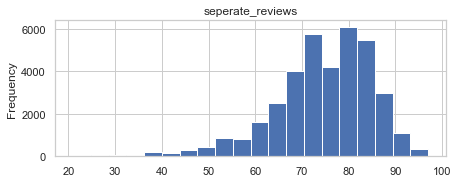




COLUMN: "user_score"
MAX:  90.0
MIN:  0.0
NaN:  0


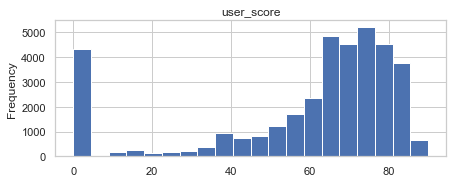

In [151]:
import matplotlib.pyplot as plt
columns_with_numbers = ['review_grade', 'seperate_reviews', 'user_score']
for c in columns_with_numbers:
    print('\nCOLUMN: "{}"\n=============================='.format(c))
    print('MAX:  {}'.format(videogame[c].max()))
    print('MIN:  {}'.format(videogame[c].min()))
    print('NaN:  {}'.format(videogame[c].isna().sum()))
    videogame[c].plot.hist(title=c, bins=20, figsize=(7,2.5))
    plt.show()
    print('\n')

C:\Users\jhoff\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\jhoff\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


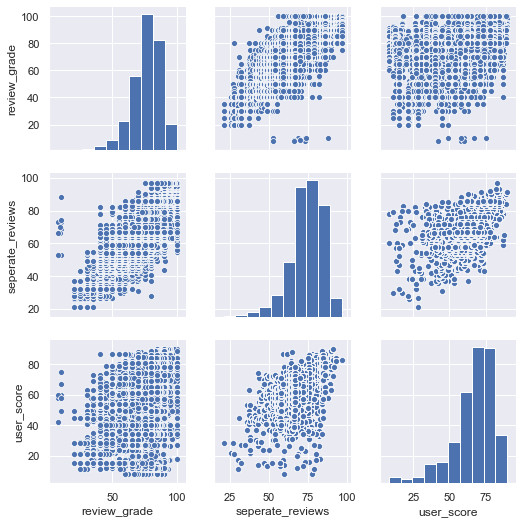

<Figure size 432x288 with 0 Axes>

In [91]:
sns.set()
cols = ['review_grade', 'seperate_reviews', 'user_score']
sns.pairplot(videogame[cols], size = 2.5)
plt.show();
plt.savefig('pairplot.png',bbox_inches='tight')